<a href="https://colab.research.google.com/github/hiteshpujari/Machine-Learning-/blob/master/WINE_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Loading the dataset**

In [3]:
data = pd.read_csv("/content/sample_data/datasets_918_1674_wineQualityReds.csv")
data.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#Check for Missing Values
data.isnull().sum()

Unnamed: 0              0
fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
#Dropping the first column containing the index values which is of no use
data = data.iloc[:,1:]
print(data.head())

   fixed.acidity  volatile.acidity  citric.acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]


In [6]:
data.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**To figure out the correlation of every other feature w.r.t the quality of the wine.**

In [18]:
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [7]:
data.corr()['quality']

fixed.acidity           0.124052
volatile.acidity       -0.390558
citric.acid             0.226373
residual.sugar          0.013732
chlorides              -0.128907
free.sulfur.dioxide    -0.050656
total.sulfur.dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

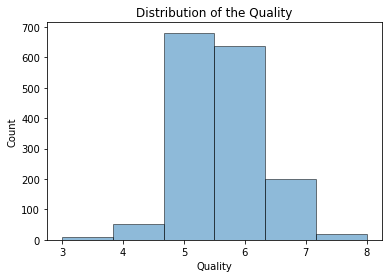

In [8]:
plt.hist(data.quality,bins=6,alpha=0.5,histtype='bar',ec='black')
plt.title('Distribution of the Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

**The above plot shows the distribution of the quality of the wine in the dataset, and represents that most of the wine is of average quality i.e. quality ranging from 5-7**

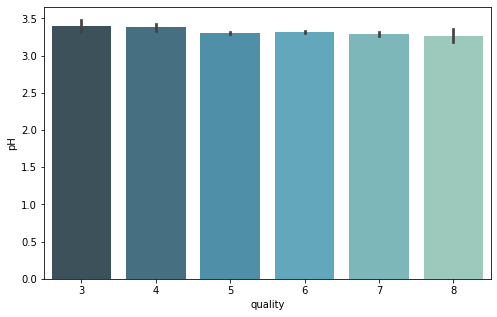

In [9]:
plt.figure(figsize=(8,5))
sns.barplot(data['quality'],data['pH'],palette="GnBu_d")
plt.show()

**From the barplot of qulaity vs ph we can visualize that there is a slight decrease in pH with the increase in quality of the wine**

**Modeling**

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

X = data.iloc[:,:11].values
Y = data.iloc[:,-1].values

In [40]:
#Splitting the dataset into training and test set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [41]:
#Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [42]:
# SHAPE OF TRAINING AND TESTING DATA
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1119, 11)
(480, 11)
(1119,)
(480,)


In [43]:
#Training using Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
print(logreg.predict(X_test))
print(Y_test)

[5 5 6 5 6 5 5 5 6 6 6 5 5 5 5 7 5 5 7 5 5 5 6 6 5 5 7 5 5 6 5 5 6 5 5 5 6
 6 5 6 5 5 6 5 6 6 7 5 5 6 5 5 6 6 5 5 6 5 6 5 5 6 5 5 7 5 7 5 6 5 6 5 6 6
 6 5 7 6 6 7 5 7 5 6 6 6 5 6 6 5 6 5 6 6 5 6 5 6 5 6 5 5 6 6 5 6 5 5 6 5 7
 5 6 5 6 6 6 5 5 6 6 5 6 5 5 5 6 6 6 6 6 5 5 6 6 5 5 5 5 6 6 6 6 6 6 5 6 5
 6 5 6 6 5 6 6 6 5 6 5 6 6 6 6 5 5 6 5 5 5 5 5 5 6 5 5 6 6 5 5 5 5 6 5 7 5
 6 5 6 7 5 6 6 5 6 6 5 5 5 5 6 5 5 5 5 7 6 5 5 6 6 6 5 6 6 6 6 5 5 6 5 5 6
 6 6 5 5 5 6 5 5 5 5 6 6 6 6 5 6 5 5 5 5 6 6 5 5 6 5 7 5 5 6 5 5 5 5 6 6 6
 7 6 6 5 7 6 6 5 5 6 6 5 6 5 5 5 5 6 6 6 5 7 5 5 5 5 6 5 6 5 6 5 7 5 5 5 6
 5 6 6 7 5 5 6 5 5 5 6 6 6 7 6 5 5 5 5 6 5 5 6 5 6 6 6 5 5 5 6 5 5 6 6 7 5
 5 5 6 6 7 5 5 6 7 6 5 6 5 6 5 6 6 5 7 5 5 5 6 5 5 5 6 6 5 6 6 5 6 6 5 5 5
 5 5 6 6 5 6 5 6 5 5 5 6 7 5 6 6 6 5 5 6 5 6 5 5 6 6 6 5 5 6 5 5 6 5 5 6 7
 6 6 5 5 7 6 6 6 6 5 7 5 6 6 5 5 5 6 6 5 5 6 5 7 5 5 5 7 5 5 5 5 6 6 6 7 5
 5 5 5 6 6 5 6 6 6 5 5 6 7 5 6 5 5 5 5 5 6 5 5 5 6 7 6 6 6 6 5 5 6 6 6 6]
[6 5 6 5 6 5 5 5 5 6 7 3 5

In [45]:
Y_Pred=logreg.predict(X_test)
print(Y_Pred)

[5 5 6 5 6 5 5 5 6 6 6 5 5 5 5 7 5 5 7 5 5 5 6 6 5 5 7 5 5 6 5 5 6 5 5 5 6
 6 5 6 5 5 6 5 6 6 7 5 5 6 5 5 6 6 5 5 6 5 6 5 5 6 5 5 7 5 7 5 6 5 6 5 6 6
 6 5 7 6 6 7 5 7 5 6 6 6 5 6 6 5 6 5 6 6 5 6 5 6 5 6 5 5 6 6 5 6 5 5 6 5 7
 5 6 5 6 6 6 5 5 6 6 5 6 5 5 5 6 6 6 6 6 5 5 6 6 5 5 5 5 6 6 6 6 6 6 5 6 5
 6 5 6 6 5 6 6 6 5 6 5 6 6 6 6 5 5 6 5 5 5 5 5 5 6 5 5 6 6 5 5 5 5 6 5 7 5
 6 5 6 7 5 6 6 5 6 6 5 5 5 5 6 5 5 5 5 7 6 5 5 6 6 6 5 6 6 6 6 5 5 6 5 5 6
 6 6 5 5 5 6 5 5 5 5 6 6 6 6 5 6 5 5 5 5 6 6 5 5 6 5 7 5 5 6 5 5 5 5 6 6 6
 7 6 6 5 7 6 6 5 5 6 6 5 6 5 5 5 5 6 6 6 5 7 5 5 5 5 6 5 6 5 6 5 7 5 5 5 6
 5 6 6 7 5 5 6 5 5 5 6 6 6 7 6 5 5 5 5 6 5 5 6 5 6 6 6 5 5 5 6 5 5 6 6 7 5
 5 5 6 6 7 5 5 6 7 6 5 6 5 6 5 6 6 5 7 5 5 5 6 5 5 5 6 6 5 6 6 5 6 6 5 5 5
 5 5 6 6 5 6 5 6 5 5 5 6 7 5 6 6 6 5 5 6 5 6 5 5 6 6 6 5 5 6 5 5 6 5 5 6 7
 6 6 5 5 7 6 6 6 6 5 7 5 6 6 5 5 5 6 6 5 5 6 5 7 5 5 5 7 5 5 5 5 6 6 6 7 5
 5 5 5 6 6 5 6 6 6 5 5 6 7 5 6 5 5 5 5 5 6 5 5 5 6 7 6 6 6 6 5 5 6 6 6 6]


In [46]:
#Making confusion matrix
cm = confusion_matrix(Y_test,Y_Pred)
print(cm)

[[  0   0   1   0   0   0]
 [  0   0  12   5   0   0]
 [  0   0 148  47   0   0]
 [  0   0  79 107  14   0]
 [  0   0   4  42  15   0]
 [  0   0   0   2   4   0]]


In [47]:
training_accuracy = logreg.score(X_train,Y_train)
print('training_accuracy:',training_accuracy)

training_accuracy: 0.6228775692582663


In [48]:
testing_accuracy = logreg.score(X_test,Y_test)
print('testing_accuracy:',testing_accuracy)

testing_accuracy: 0.5625


In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
DT_model=DecisionTreeClassifier(criterion="gini",max_depth=10)

In [51]:
DT_model.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [53]:
Y_pred_dt = DT_model.predict(X_test)

In [54]:
print("Trainig accuracy",DT_model.score(X_train,Y_train))  
print()

Trainig accuracy 0.8838248436103664



In [55]:
print("Testing accuracy",DT_model.score(X_test, Y_test))
print()

Testing accuracy 0.5208333333333334

